# Predicting Crops Yield  : A Machine Learning  Approach 
 

Cropps include :

- Cassava                
- Maize                  
- Plantains and others   
- Potatoes                
- Rice, paddy             
- Sorghum                
- Soybeans               
- Sweet potatoes       
- Wheat                  
- Yams             


In the project, machine learning methods are applied to predict crop yield using publicly available data from FAO and World Data Bank. 

Repository: https://github.com/hajir-almahdi/Machine-Learning-Capstone-Project

In [ ]:
## Google Colab
# !git clone https://github.com/EDSEL-skoltech/Intro_to_Digital_Agriculture.git
# %cd ./Intro_to_Digital_Agriculture/Agro_Optimization
# !pip install nevergrad
#!pip install git+https://github.com/mishagrol/pcse

# Part One: Gathering & Cleaning Data

### Crops Yield Data:


 
After importing required libraries, crops yield of ten most consumed crops around the world was downloaded from FAO webiste.The collected data include country, item, year starting from 1961 to 2016 and yield value. 

In [2]:
import numpy as np 
import pandas as pd 

Looking at the columns in the csv, we can rename **Value** to **hg/ha_yield** to make it easier to recognise that this is our crops yields production value. In addition to removal of unnecessary coloumns like Area Code, Domain, Item Code, etc.

In [3]:
path = './data/data_FAO/'

In [5]:
df_yield = pd.read_csv(path+'yield.csv')
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.shape

(56717, 4)

From cell above, we know the dataframe starts at 1961 and ends at 2016, this is all the avialable data up to date from FAO. 

All of the columns type are in right type. 

### Climate Data : Rainfall 
The climatic factors include rainfall and temperature. They are abiotic components, including pesticides and soil, of the environmental factors that influence plant growth and development.


Rainfall has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank. 

In [6]:
df_rain = pd.read_csv(path+'rainfall.csv')
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'], errors='coerce')


Making sure that names of columns are unified across all dataframes is important for merging after cleaning afterwards. 

We can see from cell above that average_rain_fall_mm_per_year type is an object, we need to turn it to a float value. 

Next, droping any empty rows from dataset and merge yield dataframe with rain dataframe by year and area columns

In [7]:
df_rain = df_rain.dropna()

The rainfall dataframe begins at 1985 and ends at 2016. 

In [8]:
# merge yield dataframe with rain dataframe by year and area columns 
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [9]:
df_rain

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327.0
1,Afghanistan,1986,327.0
2,Afghanistan,1987,327.0
3,Afghanistan,1989,327.0
4,Afghanistan,1990,327.0
...,...,...,...
6722,Zimbabwe,2013,657.0
6723,Zimbabwe,2014,657.0
6724,Zimbabwe,2015,657.0
6725,Zimbabwe,2016,657.0


Now, we view the final shape of the dataframe and info of values:

We can see that now the years start from the first yield dataframe the starting year was 1961, now it's 1985 because that's when the rainfall data begins. 

### Pesticides Data:
Pesticides used for each item and country was also collected from FAO database.  

In [10]:
df_pes = pd.read_csv(path+'pesticides.csv')


In [11]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)

In [12]:
# merge Pesticides dataframe with yield dataframe 
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(18949, 6)

### Average Temprature: 

Average Temprature for each country was colleced from World Bank Data. 

In [15]:
avg_temp = pd.read_csv(path+'temp.csv')

So average temprature starts from 1743 and ends at 2013, with some empty rows that we have to drop.

In [16]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})


In [17]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])


# Part Two: Data Exploration



**yield_df** is the final obtained dataframe; 

In [19]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [20]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


It can be noticed the high variance in the values for each columns, later on I'll account for that will scaling. 

In [21]:
yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [22]:
yield_df['Area'].nunique()

101

The dataframe has 101 Countries, ordering these by 10 the highest yield production: 

In [23]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

India has the highest yield production in the dataset. Inclusing items in the groupby:

In [24]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries. 

The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries. 

Now, exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

In [25]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

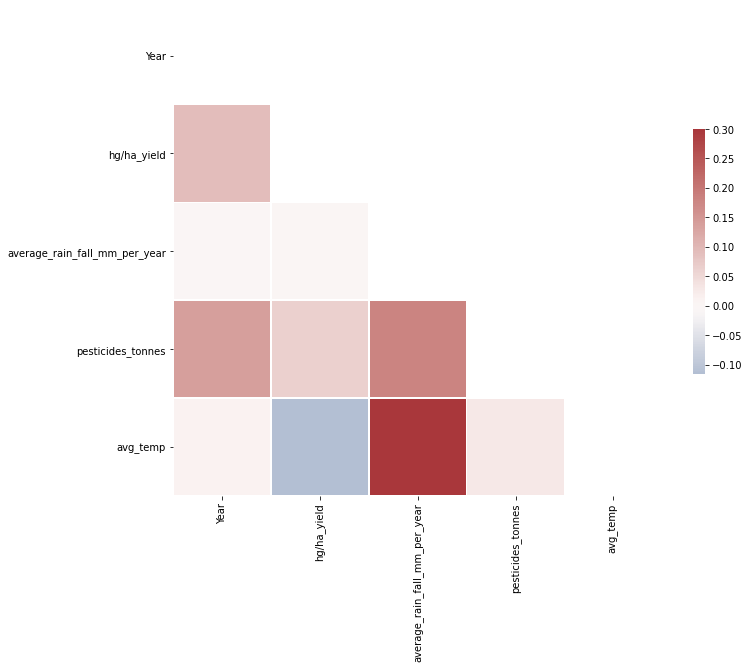

In [26]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

It can be seen from the above correlation map that there is no correlation between any of the colmuns in the dataframe. 

# Part Three: Data Preprocessing

Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.  




In [27]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


### Encoding Categorical Variables:
There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values.
Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert these two columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results. 


In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
features = features.drop(['Year'], axis=1)


### Scaling Features: 

Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

After dropping year column in addition to scaling all values in features, the resulting array will look something like this : 

In [38]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## Training Data: 

The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are 70/30 or 80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (70% of dataset is training dataset)

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. You can’t simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (30% of dataset is testing dataset) 



In [39]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [40]:
#write final df to csv file 
yield_df.to_csv('yield_df.csv')

In [41]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

# Part Four: Model Comparison & Selection 

- Gradient Boosting Regressor
- Random Forest Regressor
- SVM 
- Decision Tree Regressor


In [42]:
from sklearn.metrics import r2_score


def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [45]:
for model in models:
    name, r2 = compare_models(model)
    print(f'Model: {name}, R^2 score:{ r2:.2f}')


Model: GradientBoostingRegressor, R^2 score:0.90
Model: RandomForestRegressor, R^2 score:0.68
Model: SVR, R^2 score:-0.20
Model: DecisionTreeRegressor, R^2 score:0.96


The evaluation metric is set based on **R^2 (coefficient of determination)** regression score function, that will represents the proportion of the variance for items (crops) in the regression model. **R^2** score shows how well terms (data points) fit a curve or line.

**R^2** is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it’s fitted to. If it’s a 1, the model 100% predicts the data variance; if it’s a 0, the model predicts none of the variance. 

From results viewd above, **Decision Tree Regressor** has the highest R^2 score 0f **96%**, **GradientBoostingRegressor** comes second. 


 I'll also calculate **Adjusted R^2** also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.
Adjusted R2 will always be less than or equal to R2. 

In [46]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [47]:
yield_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,66667,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23333,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12500,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting 

test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [49]:
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.183443,0.110716,0.542078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.458451,0.000413,0.627257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.183443,0.106159,0.518228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.000000,0.224154,0.890971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.458451,0.000355,0.625213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.183443,0.110716,0.542078
1,0.458451,0.000413,0.627257
2,0.183443,0.106159,0.518228
3,1.000000,0.224154,0.890971
4,0.458451,0.000355,0.625213


In [51]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.183443,0.110716,0.542078,Spain,"Rice, paddy"
1,0.458451,0.000413,0.627257,Madagascar,Wheat
2,0.183443,0.106159,0.518228,Spain,Sorghum
3,1.000000,0.224154,0.890971,Colombia,Potatoes
4,0.458451,0.000355,0.625213,Madagascar,Sweet potatoes


In [52]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
Cassava                 0.928092
Maize                   0.893807
Plantains and others    0.804077
Potatoes                0.911331
Rice, paddy             0.891482
Sorghum                 0.787841
Soybeans                0.820066
Sweet potatoes          0.848973
Wheat                   0.922755
Yams                    0.928351
dtype: float64

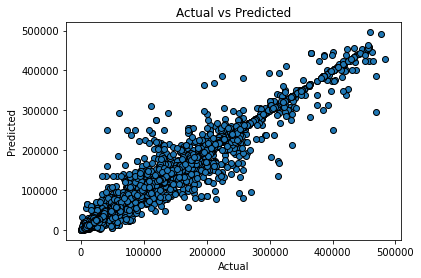

In [53]:
# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

The figure above shows the goodness of the fit with the predictions visualized as a line. It can be seen that R Square score is excellent. This means that we have found a good fitting model to predict the crops yield value for a certain country. Adding more features, like climate data; wind and pollution, the economical situation of a given country and so on will probably enhance the model’s predictions. 


In [54]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

Item
Cassava                 0.927158
Maize                   0.893121
Plantains and others    0.793965
Potatoes                0.910785
Rice, paddy             0.890579
Sorghum                 0.785940
Soybeans                0.818606
Sweet potatoes          0.847566
Wheat                   0.922216
Yams                    0.925837
dtype: float64

References
https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

https://gdcoder.com/decision-tree-regressor-explained-in-depth/

http://www.fao.org/home/en/

https://data.worldbank.org/

https://chrisalbon.com/machine_learning/trees_and_forests/decision_tree_regression/

